# SEGMENTACIÓN MEDIANTE THRESHOLDING

Segmentación mediatne técnicas de umbralización. 

Tendremos un canal de una imagen mapeado al gris el cual queremos construir una máscara binaria que tiene dos valores 0 o 1 cero si es el fondo y 1 si es la región de interés. Se utilizará el método OTSU.

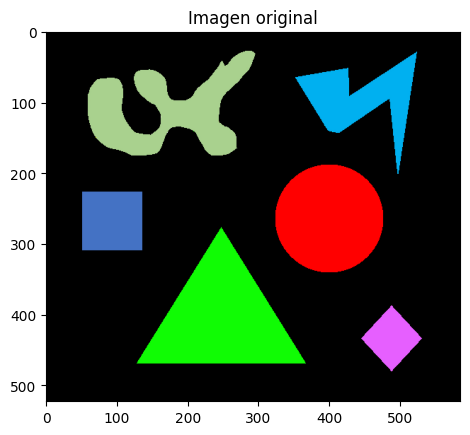

In [1]:
import matplotlib.pyplot as plt
import cv2

# Read an image
img = cv2.imread('img/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

## Convertimos la imagen a escala de grises

En este caso nos interesan todos los objetos, no los colores, vamos a llevar la imagen a una escala de gris.

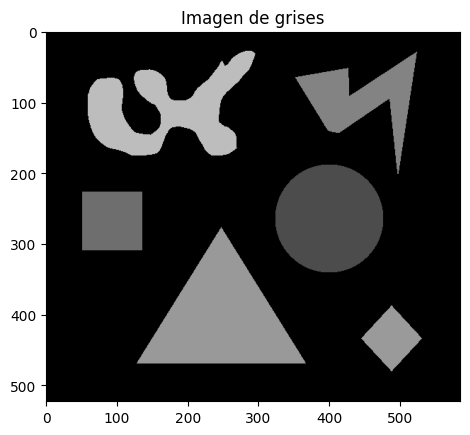

In [2]:
# Convertimos la imagen a escala de grises
import numpy as np
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_img = cv2.imread('figuras.png', 0) # Una forma de leer la imagen directamente en escala de grises

plt.imshow(gray_img, cmap='gray')
plt.title('Imagen de grises')
plt.show()

## CÁLCULO DEL HISTOGRAMA

Nos da la frecuencia, o el número de veces que un valor de intensidad se repite en nuestra imágen. 

Los valores más altos (eje x del histograma), es decir los mas cercanos a 255 son los objetos más claros de la imágen, en el eje y tenemos la frecuencia en la que se dan esas intensidades.

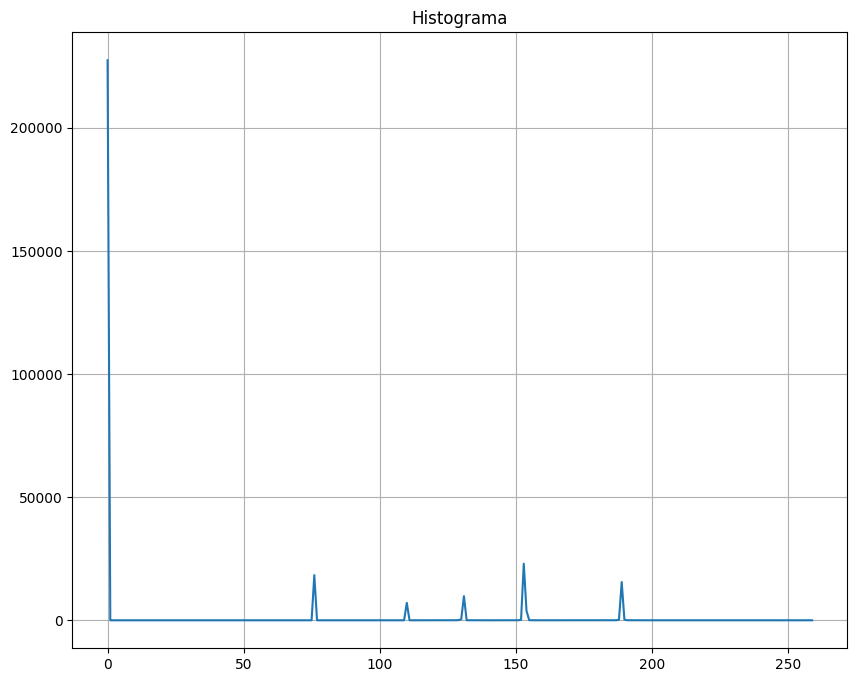

In [3]:
# Calculamos el histograma

'''
valores más cercanos a 255 son los más lumininosos
'''
hist = cv2.calcHist([gray_img], [0], None, [260], [0, 260]) # [0] son los canales, None la máscara

plt.figure(figsize= (10,8))
plt.plot(hist)
plt.grid()
plt.title('Histograma')
plt.show()

# Otra forma de mostrar el histograma (solo visualización)
# plt.hist(gray_img.ravel(), bins=50)
# plt.grid(True)
# plt.show()

#### para un umbral de 50

A la funcion cv2.threshold() se le pasa en orden:
- la imagen
- el umbral; las formas u objetos que sobrepasen este limite apareceran en la mascara booleana
- el valor maximo de intensidad
- la transformación de pasar a binario

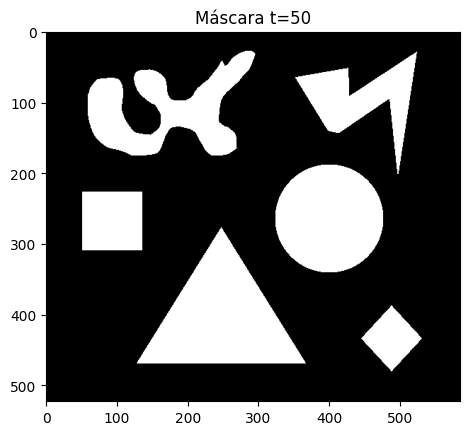

[  0 255]


In [4]:
# Fijamos el umbral en base al histograma anterior
t = 50

# Extreaemos la máscara binaria
maxim = 255
_, mask = cv2.threshold(gray_img, t, maxim, cv2.THRESH_BINARY) # con el t le indicamos el limite de intensidad a partir del cual queremos las figuras

# Otra formas de extraer la máscara 
# mask = gray_img.copy()
# mask = mask>t

# Visualizamos para corroborar
plt.imshow(mask, cmap='gray')
plt.title('Máscara t=' + str(t))
plt.show()

print(np.unique(mask)) # Atent@s a los formatos (bool, uint8, etc.)

#### para un umbral de 175

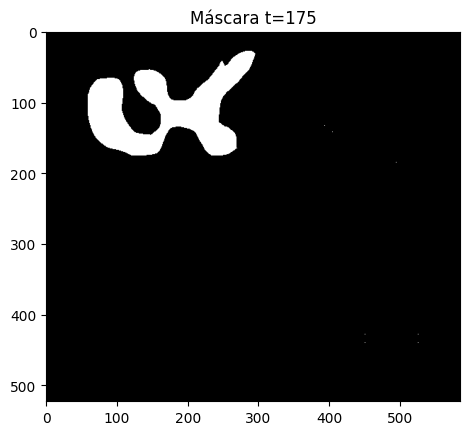

[  0 255]


In [5]:
# Fijamos el umbral en base al histograma anterior
t = 175

# Extreaemos la máscara binaria
maxim = 255
_, mask = cv2.threshold(gray_img, t, maxim, cv2.THRESH_BINARY) # con el t le indicamos el limite de intensidad a partir del cual queremos las figuras

# Otra formas de extraer la máscara 
# mask = gray_img.copy()
# mask = mask>t

# Visualizamos para corroborar
plt.imshow(mask, cmap='gray')
plt.title('Máscara t=' + str(t))
plt.show()

print(np.unique(mask)) # Atent@s a los formatos (bool, uint8, etc.)

### Fijamos el umbral con el método OTSU

OTSU es el método que hace una busqueda voraz de las varianzas de las medias de las intensidades, y se queda con el valor umbral t el cual maximiza la varianza.

OTSU esta pensado para las distribuciones bimodales, y que haya cierto equilibrio entre las clases, es decir, que una distribución no sea mucho mayor que la otra. Si hubireamos querido destacar solo los objetos más iluminados o más intensos el método OTSU no sería válido.

[0 1]


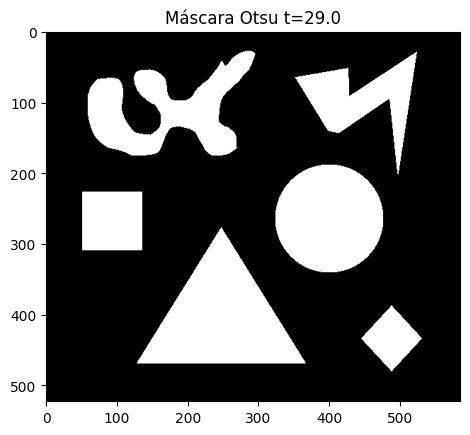

In [6]:
# Fijamos el umbral con el método de OTSU
t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_OTSU) # 0 es por defecto y 1 es el valor máximo de la máscara
print(np.unique(mask))

# Visualizamos para corroborar que se obtiene el mismo resultado
plt.imshow(mask, cmap='gray')
plt.title('Máscara Otsu t=' + str(t))
plt.show()

## SEGMENTACIÓN MEDIANTE CONVERSIONES DE COLOR

Imaginamos que queremos segmentar únicamente el círculo

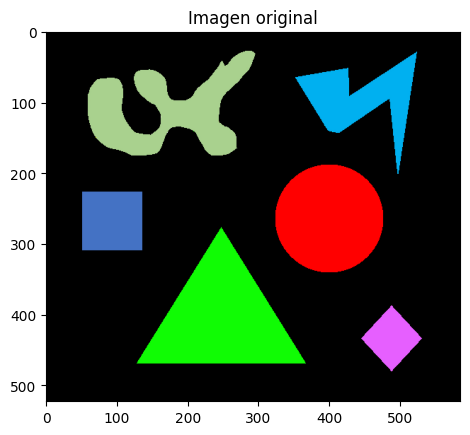

In [7]:
# Imaginamos que queremos segmentar únicamente el círculo
img = cv2.imread('img/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

### obtenemos unicamente el canal rojo

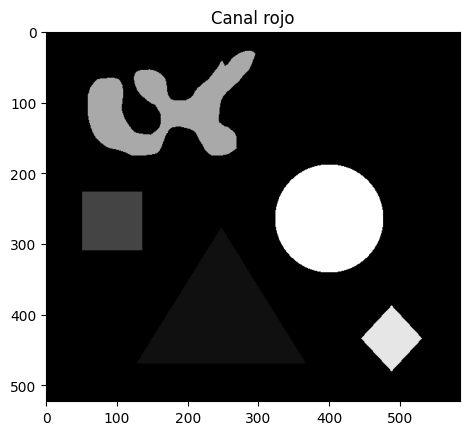

In [8]:
# Obtenemos el canal rojo
R = img[:,:,2]
'''
seran los objetos más visibles aquellos que tengan
mayor intensidad en cuanto al color rojo
'''
plt.imshow(R, cmap='gray')
plt.title('Canal rojo')
plt.show()

### Observamos el histograma

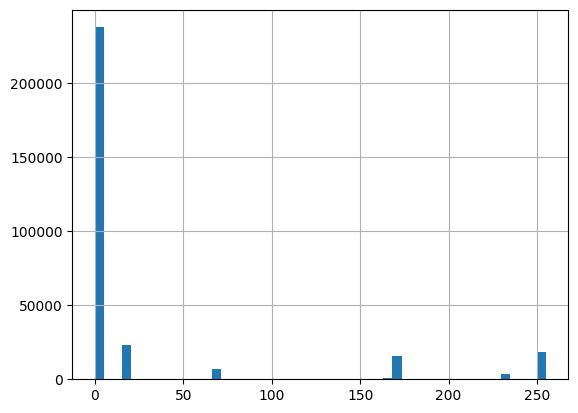

255


In [9]:
# Observamos el histograma
plt.hist(R.ravel(), bins=50) # lso bins del histograma nos dan el detalle del mismo
plt.grid(True)
plt.show()
print(np.max(R))

### Fijamos el humbral para el caso del circulo 

Ahora nuestro umbral será el maximo del objeto que queremos filtrar, como es solo rojo, unicamente aparecerá este objeto. En este caso cojemos el canal rojo y a la intensidad máxima

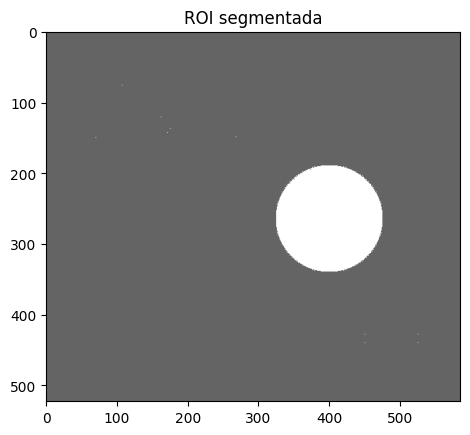

In [10]:
# Fijamos el umbral y extraemos la máscara
t=np.max(R) # cojemos el elemento más rojo y lo demas no ponemos a 0
mask = R.copy()
mask[mask<t] = 100 # esto es la intensidad del fondo, cuanto más bajo mas oscuro, valores delimitados entre 0 y 255

plt.imshow(mask, cmap='gray', vmin= 0, vmax= 255)
plt.title('ROI segmentada')
plt.show()

C:\Users\plane\AppData\Local\Temp\ipykernel_13952\3597635177.py:11: RuntimeWarning: invalid value encountered in cast
  CMYK = (np.dstack((C,M,Y,K))*255).astype('uint8')


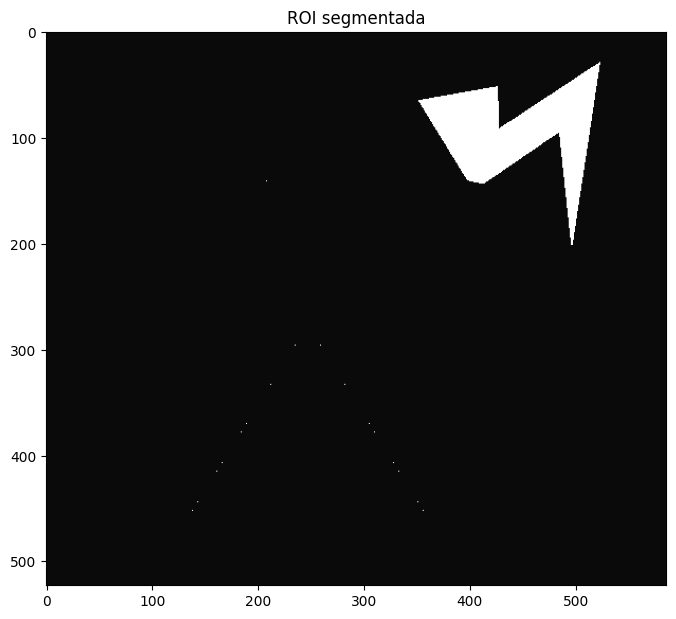

In [11]:
# Ejercicio individual
# Obtener una máscara con la imagen del rayo azul mediante segmentación por espacio de color

# Función para extraer los colores secundarios
def convert_to_CMYK(rgb_p):
    with np.errstate(invalid='ignore', divide='ignore'):
        K = 1 - np.max(rgb_p, axis=2)
        C = (1-rgb_p[:,:,0] - K)/(1-K)
        M = (1-rgb_p[:,:,1] - K)/(1-K)
        Y = (1-rgb_p[:,:,2] - K)/(1-K)
    CMYK = (np.dstack((C,M,Y,K))*255).astype('uint8')
    return CMYK

# Leer la imagen 
img = cv2.imread('img/figuras.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_p = rgb.astype('uint8')/255

# Extraer los colores secundarios
CMYK = convert_to_CMYK(rgb_p)

# Extraer los canales por separado
C,M,Y,K = cv2.split(CMYK)
C = C.astype('uint8')

# Calcular la máscara de la figura del rayo
t=np.max(C) # cojemos el elemento más rojo y lo demas no ponemos a 0
mask = C.astype('uint8')
mask[mask<t] = 10 # cambiando esto, se modifica la intensidad del fondo

# Visualizar la máscara
plt.figure(figsize= (8,8))
plt.imshow(mask, cmap='gray', vmin= 0, vmax= 255)
plt.title('ROI segmentada')
plt.show()

### SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES

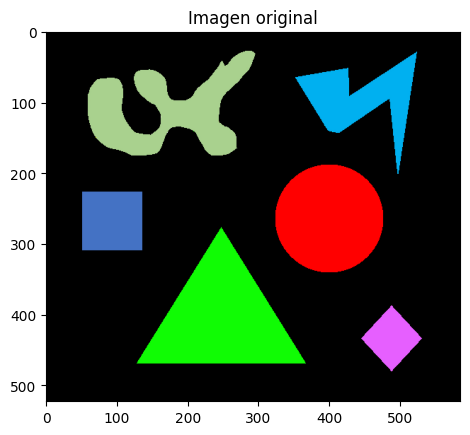

In [12]:
# SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES
img = cv2.imread('img/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

### Aplicamos un filtro gaussiano para emborronar las altas frecuencias

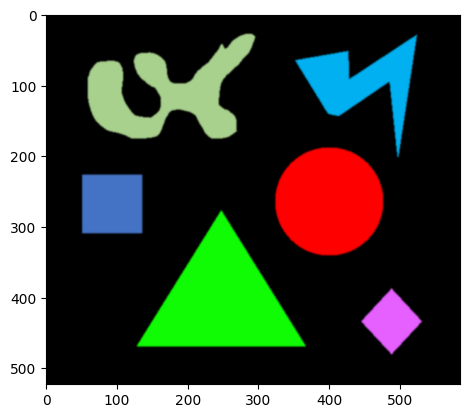

In [13]:
# Aplicamos un filtro gaussiano para emborronar las altas frecuencias
img_gaus = cv2.GaussianBlur(img_rgb, (5,5), 1) # (5x5) es el tamaño del filtro y 0 es la desviación estándar, cuanto mayor el filtro y la desviación mas suavizado estara
plt.imshow(img_gaus, cmap='gray')
plt.show()

### Detección de bordes de Canny

Open cv tiene el metodo canny ya implementado. A la función cv2.Canny() hay que pasarle:

- la imagen
- el valor maximo
- el valor mínimo

el método Canny recomienda que minValue sea 3 veces menor que el maxValue

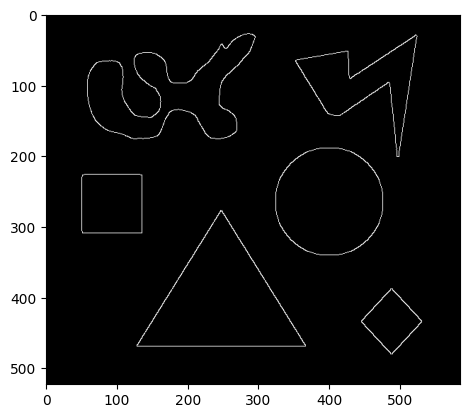

In [14]:
# Detección de bordes de Canny
canny = cv2.Canny(img_gaus, 255/3, 255) # minValue and maxValue. Canny recomienda que minValue sea 3 veces mayor que maxValue
kernel = np.ones((2,2), 'uint8')
#canny = cv2.dilate(canny, kernel, iterations=2) # con esto podemos dilatar los bordes con el tamaño del kernel, en este caso 4
#canny = cv2.erode(canny, kernel, iterations=2) # con esto hacemos lo contrario a dilatar, misma lógica que antes

plt.imshow(canny, cmap='gray')
plt.show()

### Rellenar objetos (solo rellena si no están en contacto con el límite de la imagen)

C:\Users\plane\AppData\Local\Temp\ipykernel_13952\2220132281.py:2: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes as bfh


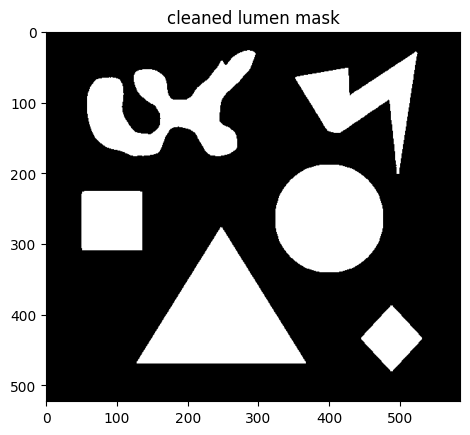

In [15]:
# Rellenar objetos (solo rellena si no están en contacto con el límite de la imagen)
from scipy.ndimage.morphology import binary_fill_holes as bfh
bordes = canny.copy()
filled_bordes = bfh(bordes)

plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('cleaned lumen mask')
plt.show()

### SEGMENTACIÓN POR CRECIMIENTO DE REGIONES (region growing)

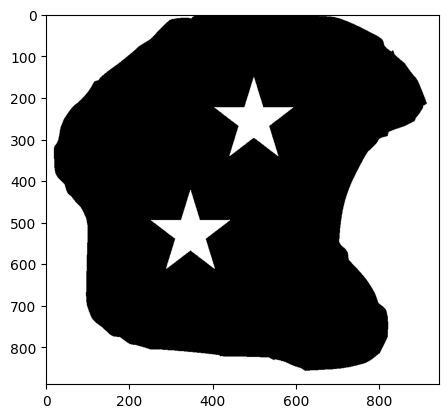

In [16]:
# Cargar imagen
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('img/estrellas.png', 0)

plt.imshow(img, cmap='gray')
plt.show()

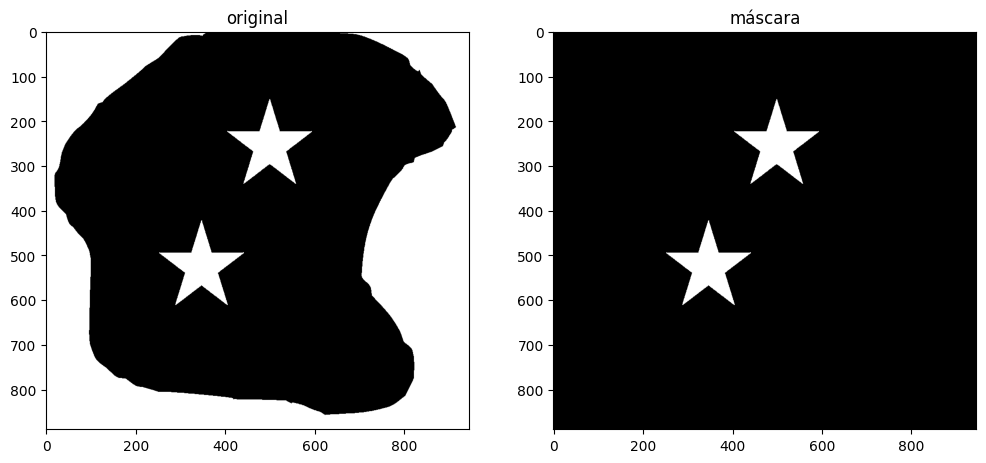

In [20]:
# Crear una copia de la imagen
mask = img.copy()

# Definir una imagen negra de referencia
h, w = img.shape
ref = np.zeros((h+2, w+2), np.uint8)

# Fijar la semilla. En este caso en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(mask, ref, (0,0),0 ); # Como nos interesa rellenar de negro, utilizamos el 0 en la última posición

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,10)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mask, cmap='gray'), ax[1].set_title('máscara')
plt.show()